In [19]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import custom functions
from scripts.data_preprocessing import preprocess_data
import joblib


ModuleNotFoundError: No module named 'scripts'

In [20]:
# Preprocess the data using the function from our script
X_scaled, y = preprocess_data('../data/credit_score.csv')

# Ensure 'y' is a pandas Series
if isinstance(y, pd.DataFrame):
    y = y.squeeze()

# Display the shapes of the features and target variable
print(f"Features shape: {X_scaled.shape}")
print(f"Target shape: {y.shape}")


NameError: name 'preprocess_data' is not defined

In [3]:
# Get statistical summary of numerical features
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CUST_ID                  1000 non-null   object 
 1   INCOME                   1000 non-null   int64  
 2   SAVINGS                  1000 non-null   int64  
 3   DEBT                     1000 non-null   int64  
 4   R_SAVINGS_INCOME         1000 non-null   float64
 5   R_DEBT_INCOME            1000 non-null   float64
 6   R_DEBT_SAVINGS           1000 non-null   float64
 7   T_CLOTHING_12            1000 non-null   int64  
 8   T_CLOTHING_6             1000 non-null   int64  
 9   R_CLOTHING               1000 non-null   float64
 10  R_CLOTHING_INCOME        1000 non-null   float64
 11  R_CLOTHING_SAVINGS       1000 non-null   float64
 12  R_CLOTHING_DEBT          1000 non-null   float64
 13  T_EDUCATION_12           1000 non-null   int64  
 14  T_EDUCATION_6            

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,121610.019000,4.131896e+05,7.907180e+05,4.063477,6.068449,5.867252,6822.401000,3466.320000,0.454848,0.055557,...,0.943607,0.913340,0.605276,0.944000,0.236000,0.173000,0.993000,0.15000,586.712000,0.284000
std,113716.699591,4.429160e+05,9.817904e+05,3.968097,5.847878,16.788356,7486.225932,5118.942977,0.236036,0.037568,...,0.168989,1.625278,1.299382,0.230037,0.424835,0.378437,0.083414,0.35725,63.413882,0.451162
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003400,...,0.666700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,300.000000,0.000000
25%,30450.250000,5.971975e+04,5.396675e+04,1.000000,1.454500,0.206200,1084.500000,319.500000,0.263950,0.029700,...,0.833300,0.158700,0.100000,1.000000,0.000000,0.000000,1.000000,0.00000,554.750000,0.000000
50%,85090.000000,2.738505e+05,3.950955e+05,2.545450,4.911550,2.000000,4494.000000,1304.000000,0.468850,0.046800,...,0.909100,0.327950,0.178600,1.000000,0.000000,0.000000,1.000000,0.00000,596.000000,0.000000
75%,181217.500000,6.222600e+05,1.193230e+06,6.307100,8.587475,4.509600,10148.500000,4555.500000,0.626300,0.069400,...,1.000000,0.833300,0.588200,1.000000,0.000000,0.000000,1.000000,0.00000,630.000000,1.000000
max,662094.000000,2.911863e+06,5.968620e+06,16.111200,37.000600,292.842100,43255.000000,39918.000000,1.058300,0.251700,...,2.000200,10.009900,10.005300,1.000000,1.000000,1.000000,1.000000,1.00000,800.000000,1.000000


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Columns with missing values:\n", missing_values)

Columns with missing values:
 Series([], dtype: int64)


In [5]:
# For numerical columns, fill missing values with the mean
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# For categorical columns, fill missing values with the mode
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [6]:
# Perform one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [7]:
# Separate features and target variable
X = df.drop(['CREDIT_SCORE', 'DEFAULT'], axis=1)
y = df['CREDIT_SCORE']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

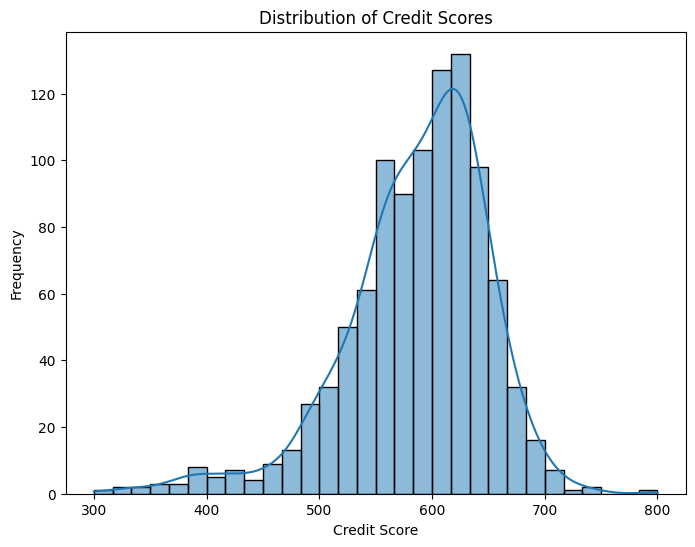

In [8]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(y, bins=30, kde=True)
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

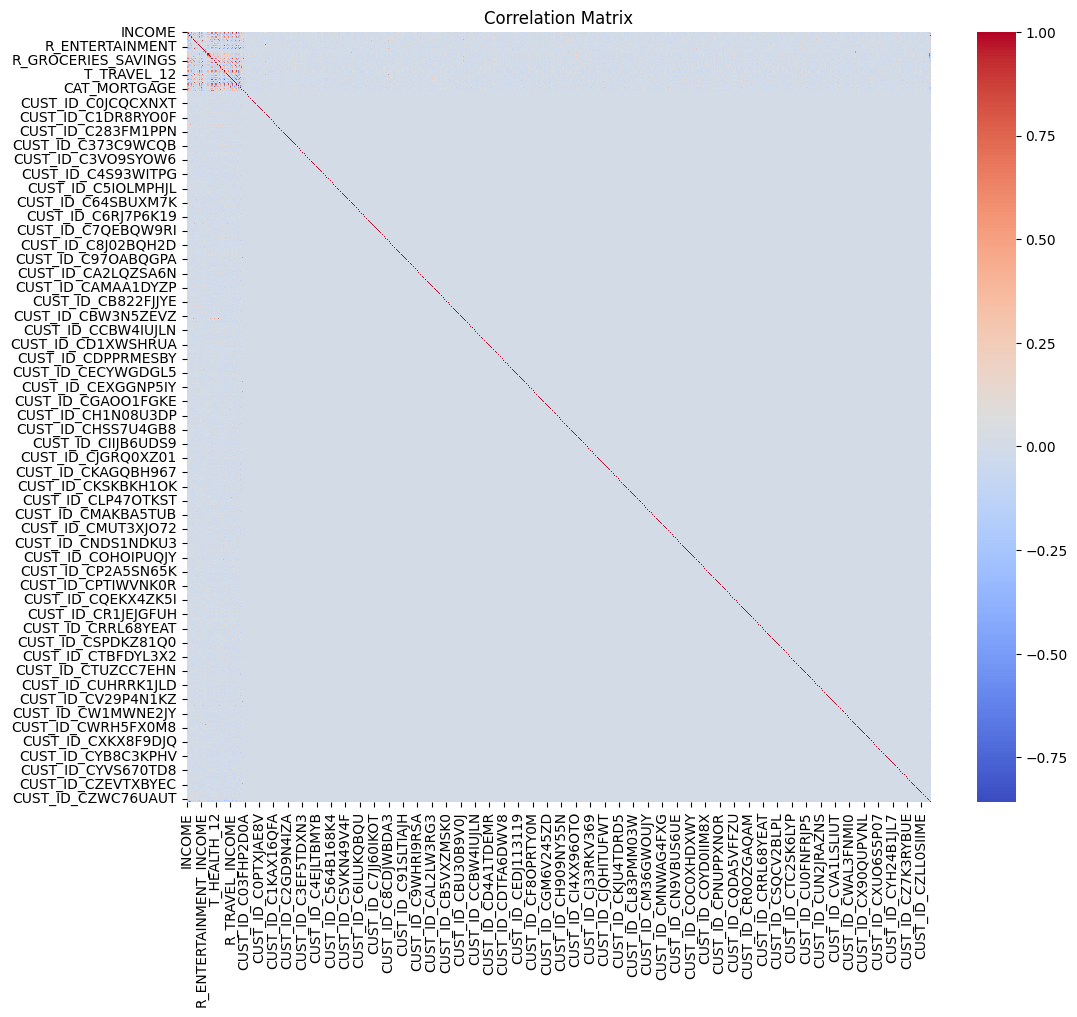

In [9]:
# Combine scaled features and target variable
df_scaled = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)

# Compute correlation matrix
corr_matrix = df_scaled.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [10]:
# Find features with strong correlation to the target variable
corr_target = corr_matrix['CREDIT_SCORE'].abs().sort_values(ascending=False)
corr_target = corr_target.drop('CREDIT_SCORE')  # Remove the target variable

# Select features with correlation coefficient greater than 0.1
selected_features = corr_target[corr_target > 0.1].index.tolist()
print("Selected features based on correlation:\n", selected_features)

Selected features based on correlation:
 ['R_DEBT_INCOME', 'R_DEBT_SAVINGS', 'DEBT', 'R_EXPENDITURE_DEBT', 'R_UTILITIES_DEBT', 'R_EDUCATION_INCOME', 'R_GROCERIES_DEBT', 'R_TAX_DEBT', 'R_ENTERTAINMENT_DEBT', 'R_HEALTH_DEBT', 'R_SAVINGS_INCOME', 'R_CLOTHING_DEBT', 'R_TRAVEL_DEBT', 'CAT_CREDIT_CARD', 'R_HOUSING_DEBT', 'R_UTILITIES_SAVINGS', 'R_EDUCATION_SAVINGS', 'CAT_DEBT', 'R_HEALTH_SAVINGS', 'R_GROCERIES_SAVINGS', 'R_GROCERIES_INCOME', 'R_EXPENDITURE', 'CAT_GAMBLING_No', 'R_ENTERTAINMENT_INCOME', 'R_HEALTH_INCOME', 'R_GAMBLING_INCOME', 'CAT_DEPENDENTS', 'R_ENTERTAINMENT', 'CUST_ID_CSC000U481', 'R_HOUSING_SAVINGS', 'CUST_ID_C6MQ5N5QNN', 'CAT_SAVINGS_ACCOUNT', 'CUST_ID_CDZMSZ6XNS', 'CUST_ID_CTQ7JZ7E75', 'R_TRAVEL', 'CUST_ID_CVQKIGJTFS', 'R_GROCERIES', 'CUST_ID_CJM3WVGMM1', 'CUST_ID_CSU0YKJ9KO', 'CUST_ID_CUSVSN476N', 'R_EDUCATION_DEBT', 'R_GAMBLING_DEBT', 'T_ENTERTAINMENT_12', 'CUST_ID_CEX92MV99H', 'CUST_ID_CN1V5NORB2', 'CUST_ID_CV6EKAFC7U', 'CUST_ID_COBPI8XRHG', 'CUST_ID_C9Z0YK6B93', 'CU

In [11]:
# Create a new DataFrame with selected features
X_selected = X_scaled[selected_features]

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

In [13]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Calculate evaluation metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print(f"Mean Squared Error: {mse_lr:.2f}")
print(f"R-squared Score: {r2_lr:.2f}")

Linear Regression Performance:
Mean Squared Error: 831.08
R-squared Score: 0.79


In [16]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Performance:")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"R-squared Score: {r2_rf:.2f}")


Random Forest Regressor Performance:
Mean Squared Error: 938.64
R-squared Score: 0.76


In [17]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found:", grid_search.best_params_)

# Use the best estimator
best_rf_model = grid_search.best_estimator_

Best parameters found: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


In [18]:
# Predict on the test set
y_pred_best_rf = best_rf_model.predict(X_test)

# Calculate evaluation metrics
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print("\nTuned Random Forest Regressor Performance:")
print(f"Mean Squared Error: {mse_best_rf:.2f}")
print(f"R-squared Score: {r2_best_rf:.2f}")


Tuned Random Forest Regressor Performance:
Mean Squared Error: 932.76
R-squared Score: 0.77
